**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
pd.set_option('display.max_rows', None)

##**Read & Show Dataset**

In [ ]:
depressionDataset = pd.read_csv('gdrive/My Drive/Student Depression/Depression Prediction Dataset.csv')

In [ ]:
depressionDataset.head()

,AGE,GENDER,PMPCOVID-19,FFP,FPPS,UPSET,HISSUE,ALCDRUINV,ANGER,SL6-8,SUICIDAL,TISM,TWF,WORRIEDF,HARASS,LOIW,INDES,RIDICULED,NIGHTSCREENTIME,WORRIEDP,ATHENS INSOMNIA SCORE,INSOMNIAC,PHQ-9 SCORE,DEPRESSED
0,23,Male,No,Low Financial Problem,No,No,No,No,No,Yes,No,More then 5 hour,2-4 hour,No,No,No,No,No,2-4 hour,Yes,6,Yes,2,0
1,26,Male,No,Low Financial Problem,No,No,No,No,No,Yes,No,More then 5 hour,2-4 hour,No,No,No,Yes,No,Less then 1 hour,No,7,Yes,4,0
2,24,Female,No,No Financial Problem,No,Yes,No,No,Yes,Yes,No,More then 5 hour,Less then 1 hour,Yes,No,Yes,Yes,No,More then 5 hour,Yes,9,Yes,9,1
3,22,Female,No,No Financial Problem,No,No,No,No,No,No,No,More then 5 hour,More then 5 hour,No,No,No,No,No,More then 5 hour,No,0,No,0,0
4,22,Male,No,Low Financial Problem,No,No,Yes,Yes,No,No,No,More then 5 hour,2-4 hour,No,No,Yes,Yes,No,More then 5 hour,Yes,15,Yes,5,1


In [ ]:
depressionDataset.describe()

,AGE,ATHENS INSOMNIA SCORE,PHQ-9 SCORE,DEPRESSED
count,411.000000,411.000000,411.000000,411.000000
mean,22.318735,3.618005,3.503650,0.267640
std,2.154545,4.161680,4.081112,0.443268
min,18.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000
50%,22.000000,2.000000,2.000000,0.000000
75%,23.000000,5.000000,5.000000,1.000000
max,33.000000,22.000000,27.000000,1.000000


##**Mapping**

In [ ]:
depression_Dataset = [depressionDataset]

In [ ]:
#Age Column
for dataset in depression_Dataset:
  dataset.loc[dataset['AGE']<=15, 'AGE'] = 0
  dataset.loc[(dataset['AGE']>15) & (dataset['AGE']<=20), 'AGE'] = 1
  dataset.loc[(dataset['AGE']>20) & (dataset['AGE']<=25), 'AGE'] = 2
  dataset.loc[dataset['AGE'] >25, 'AGE'] = 3

In [ ]:
# Gender Column
gender_maping = {"Male":1,"Female":0}
for dataset in depression_Dataset:
  dataset['GENDER'] = dataset['GENDER'].map(gender_maping)

# Financial Problem Column
FFP_maping = {"No Financial Problem":0,"Low Financial Problem":1, "Serious FInancial Problem":2}
for dataset in depression_Dataset:
  dataset['FFP'] = dataset['FFP'].map(FFP_maping)

In [ ]:
# Function for All Yes/No
def YesNoAns(column):
    mapping = {"No":0,"Yes":1}
    for dataset in depression_Dataset:
      dataset[column] = dataset[column].map(mapping)

YesNoAns('PMPCOVID-19')
YesNoAns('FPPS')
YesNoAns('UPSET')
YesNoAns('HISSUE')
YesNoAns('ALCDRUINV')
YesNoAns('ANGER')
YesNoAns('SL6-8')
YesNoAns('SUICIDAL')
YesNoAns('WORRIEDF')
YesNoAns('HARASS')
YesNoAns('LOIW')
YesNoAns('INDES')
YesNoAns('RIDICULED')
YesNoAns('WORRIEDP')
YesNoAns('INSOMNIAC')

In [ ]:
#Function for Spending Time
def SpendTime(column):
    mapping = {"Less then 1 hour":0,"2-4 hour":1, "More then 5 hour":2}
    for dataset in depression_Dataset:
      dataset[column] = dataset[column].map(mapping)

SpendTime('TISM')
SpendTime('TWF')
SpendTime('NIGHTSCREENTIME')

In [ ]:
depressionDataset.head()

,AGE,GENDER,PMPCOVID-19,FFP,FPPS,UPSET,HISSUE,ALCDRUINV,ANGER,SL6-8,SUICIDAL,TISM,TWF,WORRIEDF,HARASS,LOIW,INDES,RIDICULED,NIGHTSCREENTIME,WORRIEDP,ATHENS INSOMNIA SCORE,INSOMNIAC,PHQ-9 SCORE,DEPRESSED
0,2,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,1,6,1,2,0
1,3,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,1,0,0,0,7,1,4,0
2,2,0,0,0,0,1,0,0,1,1,0,2,0,1,0,1,1,0,2,1,9,1,9,1
3,2,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,0
4,2,1,0,1,0,0,1,1,0,0,0,2,1,0,0,1,1,0,2,1,15,1,5,1


##**Devide and Train Test**

**Dividing Dataset**

In [ ]:
X = depressionDataset[['AGE','GENDER','PMPCOVID-19','FFP','FPPS','UPSET','HISSUE','ALCDRUINV','ANGER','SL6-8','SUICIDAL','TISM','TWF','WORRIEDF','HARASS','LOIW','INDES','RIDICULED','NIGHTSCREENTIME','WORRIEDP','INSOMNIAC']]
y = depressionDataset[['DEPRESSED']]

**Train and Test**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

##**Apply Classifiers**

**Logistic Regression**

In [ ]:
logRegression=LogisticRegression()
logRegression.fit(X_train,y_train)

y_predictionLogistic=logRegression.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionLogistic))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test,y_predictionLogistic))
print("\nReport for Logistic: ")
print(metrics.classification_report(y_test,y_predictionLogistic))

Accuracy:  0.7983870967741935

Confusion Matrix:
[[84  7]
 [18 15]]

Report for Logistic: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        91
           1       0.68      0.45      0.55        33

    accuracy                           0.80       124
   macro avg       0.75      0.69      0.71       124
weighted avg       0.79      0.80      0.78       124



**Multi-layer Perceptron(MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPClassification=MLPClassifier(random_state=0)
MLPClassification.fit(X_train,y_train)
y_predictionMLP=MLPClassification.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test, y_predictionMLP))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test,y_predictionMLP))

print("\nReport for MLP: ")
print(metrics.classification_report(y_test,y_predictionMLP))

Accuracy 0.782258064516129

Confusion Matrix:
[[81 10]
 [17 16]]

Report for MLP: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        91
           1       0.62      0.48      0.54        33

    accuracy                           0.78       124
   macro avg       0.72      0.69      0.70       124
weighted avg       0.77      0.78      0.77       124



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RndmForestClassification=RandomForestClassifier()
RndmForestClassification.fit(X_train,y_train)
y_predictionRndmForest=RndmForestClassification.predict(X_test)
print("Accuracy: ")
print(metrics.accuracy_score(y_test, y_predictionRndmForest))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_predictionRndmForest))

print("\nReport for Random Forest: ")
print(metrics.classification_report(y_test,y_predictionRndmForest))

Accuracy: 
0.7661290322580645

Confusion Matrix
[[79 12]
 [17 16]]

Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        91
           1       0.57      0.48      0.52        33

    accuracy                           0.77       124
   macro avg       0.70      0.68      0.68       124
weighted avg       0.76      0.77      0.76       124



**Support Vector Machine(SVM)**

In [ ]:
from sklearn import svm

svmClassification = svm.SVC(kernel='linear')
svmClassification.fit(X_train, y_train)
y_pred = svmClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for SVM: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7903225806451613

Confusion Matrix
[[84  7]
 [19 14]]

Report for SVM: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        91
           1       0.67      0.42      0.52        33

    accuracy                           0.79       124
   macro avg       0.74      0.67      0.69       124
weighted avg       0.78      0.79      0.77       124



**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnbClassification = MultinomialNB()
mnbClassification.fit(X_train, y_train)
y_pred = mnbClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Multinomial Naive Bayes: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.8225806451612904

Confusion Matrix
[[82  9]
 [13 20]]

Report for Multinomial Naive Bayes: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        91
           1       0.69      0.61      0.65        33

    accuracy                           0.82       124
   macro avg       0.78      0.75      0.76       124
weighted avg       0.82      0.82      0.82       124



**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussianClassification = GaussianNB()
gaussianClassification.fit(X_train, y_train)
y_pred = gaussianClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Gaussian Naive Bayes: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7983870967741935

Confusion Matrix
[[76 15]
 [10 23]]

Report for Gaussian Naive Bayes: 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        91
           1       0.61      0.70      0.65        33

    accuracy                           0.80       124
   macro avg       0.74      0.77      0.75       124
weighted avg       0.81      0.80      0.80       124



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientClassification = GradientBoostingClassifier(random_state=0,n_estimators=50)
gradientClassification.fit(X_train, y_train)
y_pred = gradientClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Gradient Boosting: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7903225806451613

Confusion Matrix
[[83  8]
 [18 15]]

Report for Gradient Boosting: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        91
           1       0.65      0.45      0.54        33

    accuracy                           0.79       124
   macro avg       0.74      0.68      0.70       124
weighted avg       0.78      0.79      0.78       124



**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassification = AdaBoostClassifier(random_state=0,n_estimators=100)
adaBoostClassification.fit(X_train, y_train)
y_pred = adaBoostClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for AdaBoost: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7580645161290323

Confusion Matrix
[[80 11]
 [19 14]]

Report for AdaBoost: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        91
           1       0.56      0.42      0.48        33

    accuracy                           0.76       124
   macro avg       0.68      0.65      0.66       124
weighted avg       0.74      0.76      0.75       124



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeClassification = DecisionTreeClassifier(random_state=10)
decisionTreeClassification.fit(X_train, y_train)
y_pred = decisionTreeClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Decision Tree: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7741935483870968

Confusion Matrix
[[77 14]
 [14 19]]

Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        91
           1       0.58      0.58      0.58        33

    accuracy                           0.77       124
   macro avg       0.71      0.71      0.71       124
weighted avg       0.77      0.77      0.77       124



**k-Nearest Neighbours(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnClassification = KNeighborsClassifier()
knnClassification.fit(X_train, y_train)
y_pred = knnClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for KNN: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7580645161290323

Confusion Matrix
[[84  7]
 [23 10]]

Report for KNN: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        91
           1       0.59      0.30      0.40        33

    accuracy                           0.76       124
   macro avg       0.69      0.61      0.62       124
weighted avg       0.73      0.76      0.73       124



**Quadratic Discriminant Analysis(QDA)**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qdaClassification = QuadraticDiscriminantAnalysis()
qdaClassification.fit(X_train, y_train)
y_pred = qdaClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for QDA: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7580645161290323

Confusion Matrix
[[70 21]
 [ 9 24]]

Report for QDA: 
              precision    recall  f1-score   support

           0       0.89      0.77      0.82        91
           1       0.53      0.73      0.62        33

    accuracy                           0.76       124
   macro avg       0.71      0.75      0.72       124
weighted avg       0.79      0.76      0.77       124



**Extra Tree**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extraTreeClassification = ExtraTreesClassifier(random_state=0,n_estimators=100)
extraTreeClassification.fit(X_train, y_train)
y_pred = extraTreeClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Extra Tree: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7741935483870968

Confusion Matrix
[[77 14]
 [14 19]]

Report for Extra Tree: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        91
           1       0.58      0.58      0.58        33

    accuracy                           0.77       124
   macro avg       0.71      0.71      0.71       124
weighted avg       0.77      0.77      0.77       124



**Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(),LogisticRegression(random_state=123))
baggingClassification = BaggingClassifier(base_estimator=pipeline)
baggingClassification.fit(X_train, y_train)
y_pred = baggingClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Bagging: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.782258064516129

Confusion Matrix
[[80 11]
 [16 17]]

Report for Bagging: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        91
           1       0.61      0.52      0.56        33

    accuracy                           0.78       124
   macro avg       0.72      0.70      0.71       124
weighted avg       0.77      0.78      0.78       124



**Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
stackingClassification = StackingClassifier(estimators)
stackingClassification.fit(X_train, y_train)
y_pred = stackingClassification.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nReport for Stacking: ")
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.782258064516129

Confusion Matrix
[[84  7]
 [20 13]]

Report for Stacking: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        91
           1       0.65      0.39      0.49        33

    accuracy                           0.78       124
   macro avg       0.73      0.66      0.68       124
weighted avg       0.77      0.78      0.76       124



In [ ]:
depressionDataset.head()

,AGE,GENDER,PMPCOVID-19,FFP,FPPS,UPSET,HISSUE,ALCDRUINV,ANGER,SL6-8,SUICIDAL,TISM,TWF,WORRIEDF,HARASS,LOIW,INDES,RIDICULED,NIGHTSCREENTIME,WORRIEDP,ATHENS INSOMNIA SCORE,INSOMNIAC,PHQ-9 SCORE,DEPRESSED
0,2,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,1,6,1,2,0
1,3,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,1,0,0,0,7,1,4,0
2,2,0,0,0,0,1,0,0,1,1,0,2,0,1,0,1,1,0,2,1,9,1,9,1
3,2,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,0
4,2,1,0,1,0,0,1,1,0,0,0,2,1,0,0,1,1,0,2,1,15,1,5,1


##**Insomnic**

In [ ]:
insomniaData = depressionDataset
insomniaData.head()

,AGE,GENDER,PMPCOVID-19,FFP,FPPS,UPSET,HISSUE,ALCDRUINV,ANGER,SL6-8,SUICIDAL,TISM,TWF,WORRIEDF,HARASS,LOIW,INDES,RIDICULED,NIGHTSCREENTIME,WORRIEDP,ATHENS INSOMNIA SCORE,INSOMNIAC,PHQ-9 SCORE,DEPRESSED
0,2,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,1,6,1,2,0
1,3,1,0,1,0,0,0,0,0,1,0,2,1,0,0,0,1,0,0,0,7,1,4,0
2,2,0,0,0,0,1,0,0,1,1,0,2,0,1,0,1,1,0,2,1,9,1,9,1
3,2,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,0
4,2,1,0,1,0,0,1,1,0,0,0,2,1,0,0,1,1,0,2,1,15,1,5,1


In [ ]:
insomnicDF = depressionDataset
insomnicDF['INSOMNIAC'] = insomnicDF['INSOMNIAC'].replace([0],'No')
insomnicDF['INSOMNIAC'] = insomnicDF['INSOMNIAC'].replace([1],'Yes')

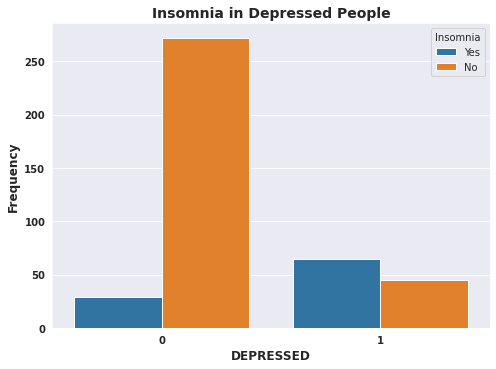

In [ ]:
fig = plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(depressionDataset['DEPRESSED'], hue=depressionDataset['INSOMNIAC'])
plt.xlabel('DEPRESSED', weight='bold', fontsize=12)
plt.ylabel('Frequency', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.tight_layout()
plt.title('Insomnia in Depressed People', weight='bold', fontsize=14)
plt.legend(title='Insomnia')
plt.show()

##**Visualization**

In [ ]:
df = depressionDataset
df['DEPRESSED'] = df['DEPRESSED'].replace([0],'No')
df['DEPRESSED'] = df['DEPRESSED'].replace([1],'Yes')

df['GENDER'] = df['GENDER'].replace([0],'Female')
df['GENDER'] = df['GENDER'].replace([1],'Male')

Text(0.5, 1.0, '(B)')

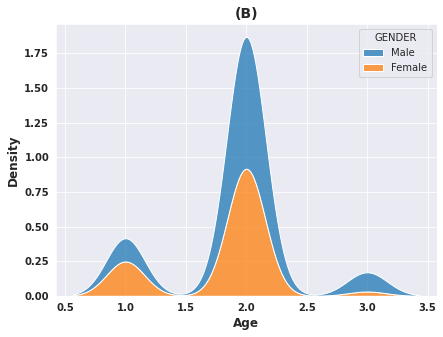

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
fig.add_subplot(122)
sns.kdeplot(depressionDataset['AGE'], hue=depressionDataset['GENDER'], multiple="stack")
plt.xlabel('Age', weight='bold', fontsize=12)
plt.ylabel('Density', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title('(B)', weight='bold', fontsize=14)

In [ ]:
# ''' Detection '''
# # IQR
# Q1 = np.percentile(df['AGE'], 25, interpolation='midpoint')
# Q3 = np.percentile(df['AGE'], 75, interpolation='midpoint')
# IQR = Q3 - Q1
# print("Old Shape: ", df.shape)


# # Upper bound
# upper = np.where(df['AGE'] >= (Q3 + 1.5 * IQR))
# # Lower bound
# lower = np.where(df['AGE'] <= (Q1 - 1.5 * IQR))

# ''' Removing the Outliers '''
# df1.drop(upper[0], inplace=True)
# df1.drop(lower[0], inplace=True)

# print("New Shape: ", df1.shape)

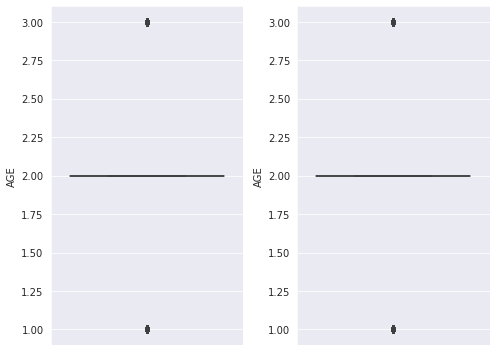

In [ ]:
fig = plt.figure(figsize=(7,5))
fig.add_subplot(121)
sns.set_style('darkgrid')
sns.boxplot(y=depressionDataset['AGE'])
fig.add_subplot(122)
sns.set_style('darkgrid')
sns.boxplot(y=df['AGE'])
plt.tight_layout()
plt.show()

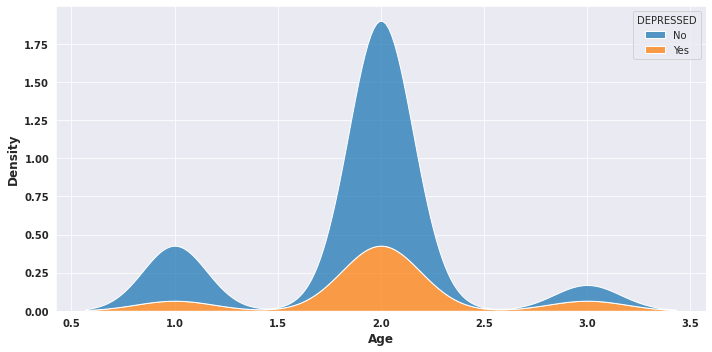

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.kdeplot(depressionDataset['AGE'], hue=depressionDataset['DEPRESSED'], multiple="stack")
plt.xlabel('Age', weight='bold', fontsize=12)
plt.ylabel('Density', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.tight_layout()
plt.show()

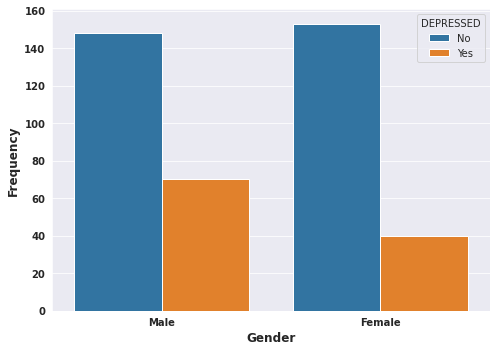

In [ ]:
fig = plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(depressionDataset['GENDER'], hue=depressionDataset['DEPRESSED'])
plt.xlabel('Gender', weight='bold', fontsize=12)
plt.ylabel('Frequency', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.tight_layout()
plt.show()

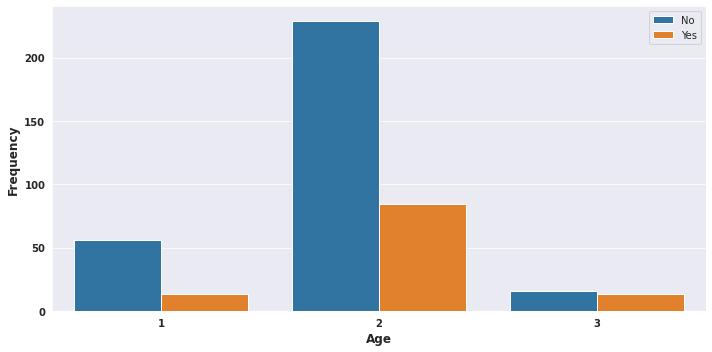

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(depressionDataset['AGE'], hue=depressionDataset['DEPRESSED'])
plt.xlabel('Age', weight='bold', fontsize=12)
plt.ylabel('Frequency', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()